In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
# load data
data = pd.read_csv("/content/minimum_temperature.csv")
data1 = pd.read_csv("/content/sunspots.csv")
# Assuming X_train and y_train are your data


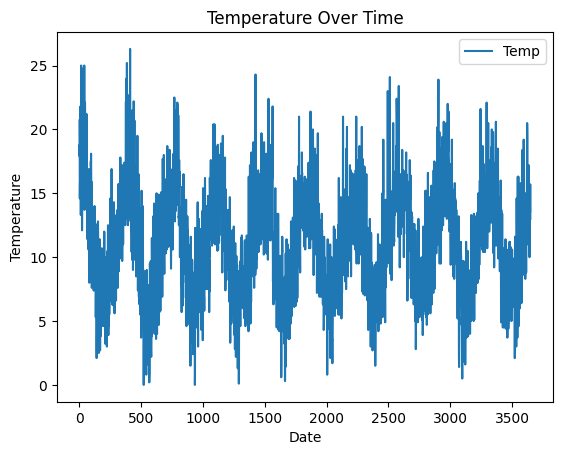

In [ ]:
import matplotlib.pyplot as plt

data.plot()
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it includes a 'Date' column
# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)



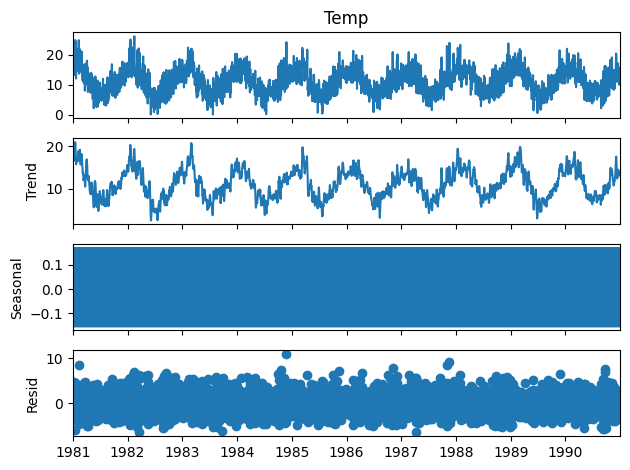

In [ ]:

# Ensure that the frequency is set (e.g., 'D' for daily data)
data = data.asfreq('D')
data['Temp'].fillna(data['Temp'].mean(), inplace=True)
# Now you can apply the seasonal_decompose function
result = seasonal_decompose(data['Temp'], model='additive')


# Plotting the decomposed components of the time series
result.plot()
plt.savefig('decomposed_temp.png')
plt.show()

In [ ]:
data['Temp'].fillna(data['Temp'].mean(), inplace=True)

In [ ]:
data['Temp'].isna().unique()

array([False])

In [ ]:
data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/minimum_temperature.csv', parse_dates=['Date'], index_col='Date')

# Preprocessing: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Temp'].values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshape input data to be 3D [samples, time steps, features] for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions
predicted = model.predict(X_test)

# Invert predictions back to original scale
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('Test RMSE: %.3f' % rmse)


Epoch 1/10
82/82 [==============================] - 4s 18ms/step - loss: 0.0270 - val_loss: 0.0113
Epoch 2/10
82/82 [==============================] - 1s 8ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 3/10
82/82 [==============================] - 1s 8ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 4/10
82/82 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 5/10
82/82 [==============================] - 0s 5ms/step - loss: 0.0114 - val_loss: 0.0110
Epoch 6/10
82/82 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 7/10
82/82 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0104
Epoch 8/10
82/82 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.0104
Epoch 9/10
82/82 [==============================] - 0s 5ms/step - loss: 0.0107 - val_loss: 0.0103
Epoch 10/10
23/23 [==============================] - 1s 3ms/step
Test RMSE: 2.437


23/23 [==============================] - 0s 2ms/step
Test RMSE:  308.38173152135204


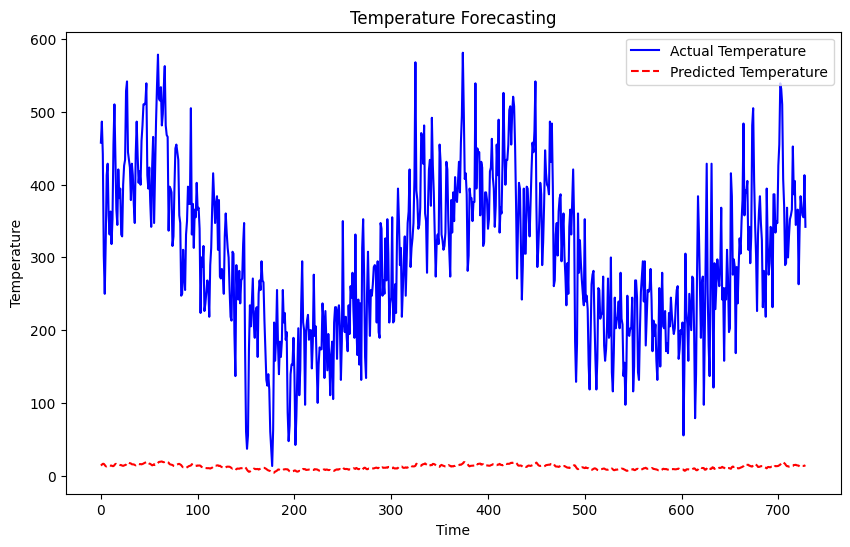

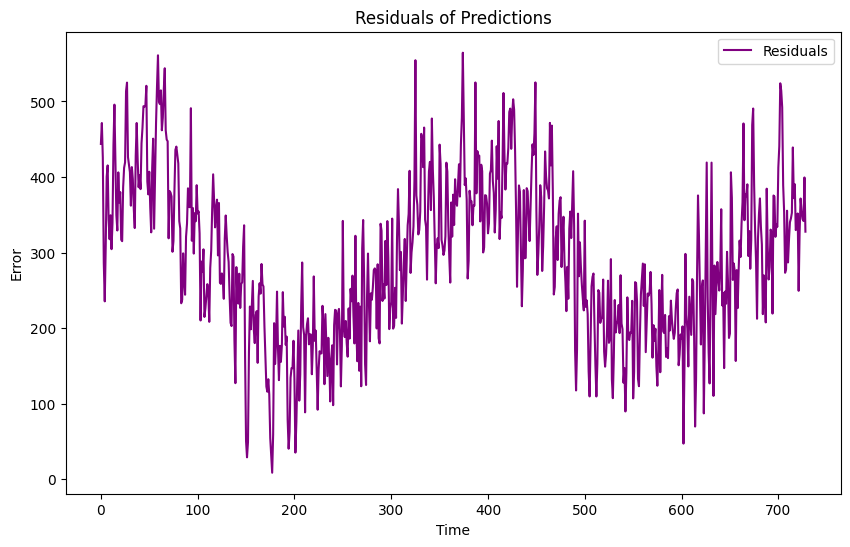

Residuals mean:  289.79022433978207
Residuals std:  105.45576424836133


In [ ]:
import matplotlib.pyplot as plt

# Predict on the test set
predicted = model.predict(X_test)

# Invert the scaling for prediction to get them back to original scale
predicted_inverse = scaler.inverse_transform(predicted)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predicted_inverse))
print('Test RMSE: ', rmse)

# Plotting the results: actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse, label='Actual Temperature', color='blue')
plt.plot(predicted_inverse, label='Predicted Temperature', color='red', linestyle='--')
plt.title('Temperature Forecasting')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Residual Analysis
residuals = y_test_inverse - predicted_inverse

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.title('Residuals of Predictions')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.savefig('residuals.png')
plt.show()

# Statistical summary of residuals
print('Residuals mean: ', np.mean(residuals))
print('Residuals std: ', np.std(residuals))


In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   input_shape=(sequence_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mse')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=7,
    executions_per_trial=3,
    directory='my_dir',
    project_name='keras_lstm_temperature')

tuner.search_space_summary()

# Perform the hyperparameter search
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss = best_model.evaluate(X_test, y_test)
print('Test Loss: ', loss)


Reloading Tuner from my_dir/keras_lstm_temperature/tuner0.json
Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
23/23 [==============================] - 1s 25ms/step - loss: 135.7977
Test Loss:  135.7976531982422


23/23 [==============================] - 1s 34ms/step


Mean Absolute Error (MAE): 287.6056214296736
Mean Absolute Percentage Error (MAPE): 94.77688454109077
R-squared: -7.0576662803338674
Mean Squared Error (MSE): 93929.87649517543


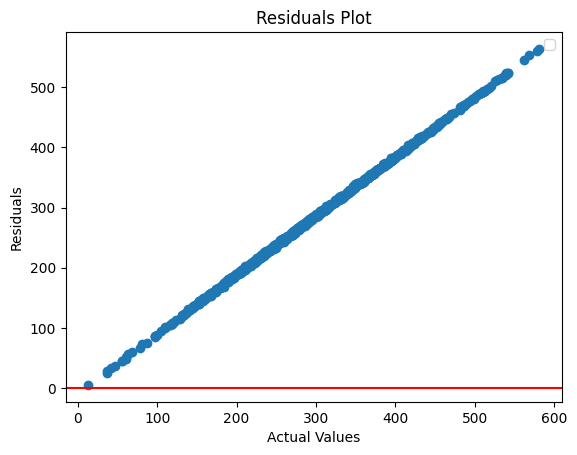

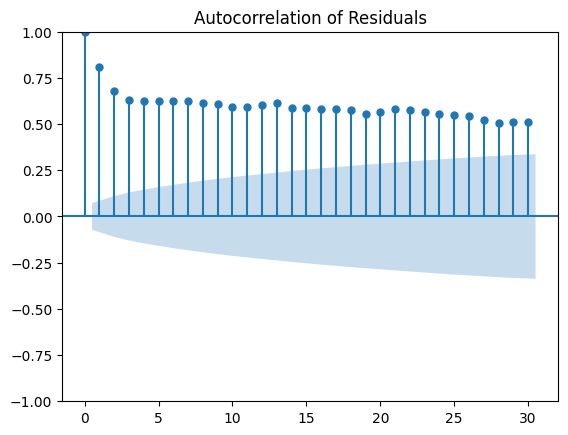

In [ ]:
# Your existing LSTM model training and prediction code here...
# ...
from statsmodels.graphics.tsaplots import plot_acf
# After making predictions:
predicted = best_model.predict(X_test)
predicted_inverse = scaler.inverse_transform(predicted)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_inverse, predicted_inverse)
mape = np.mean(np.abs((y_test_inverse - predicted_inverse) / y_test_inverse)) * 100
r2 = r2_score(y_test_inverse, predicted_inverse)
mse = mean_squared_error(y_test_inverse, predicted_inverse)
# Print the metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('R-squared:', r2)
print('Mean Squared Error (MSE):', mse)
# Plotting the residuals
residuals = y_test_inverse - predicted_inverse
plt.scatter(y_test_inverse, residuals)
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Autocorrelation of residuals
plot_acf(residuals, lags=30)
plt.title('Autocorrelation of Residuals')
plt.show()
